In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from glob import glob
import seaborn as sns
import MDAnalysis as mda
from MDAnalysis import Universe
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import distances
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

In [6]:
pal = ["#8E7EEA", 
       "#929292"
      ]


def plot_rmsf(df, res1, res2, title, sig=True, pip='PIP2'):
    dat = df[(df.og_num > res1) & (df.og_num < res2)]
    
    t=[]
    for i in np.unique(dat['og_num']):
        vdf = dat[dat['og_num']==i]
        t.append(ttest_ind(vdf[vdf['PIP']=='+'+pip]['rmsf'], vdf[vdf['PIP']=='-'+pip]['rmsf'])[1])

    dfstat=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
    
    if sig:
        dat2 = dat[dat["og_num"].isin(list(dfstat[dfstat['stat']<0.05].index))]
    else:
        dat2 = dat 

    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(len(dat)/10, 5))

    sns.barplot(
        data=dat, 
        x="og_num", y="rmsf", ax=ax, hue="PIP",
        alpha=.8, palette=pal
    )
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
    return None
    

def plot_rmsf_signif(df, res1, res2, title, sig=True, pip='PIP2', pal=pal):
    dat = df[(df.og_num > res1) & (df.og_num < res2)]

    hue_plot_params = {
        'data': dat,
        'x': 'og_num',
        'y': 'rmsf',
        "hue": "PIP",
        "palette": pal
    }
    
    pairs = []
    for resid in dat.og_num.unique():
        l = [(resid, dat.PIP.unique()[0]), (resid, dat.PIP.unique()[1])]
        pairs.append(l)

    fig, ax = plt.subplots(figsize=(len(dat[dat['PIP']=='-PIP1/2'])/7, 5))
    ax = sns.barplot(ax=ax, **hue_plot_params, 
                    alpha=.8)#, errorbar='se')

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()
        
    print(pairs)
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
    return None



# read trajectories

In [7]:
adir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/'
bdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/'
cdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/CWCW_SAP/'
ddir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/DCWC_PCX/'
edir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/EWT1_SAP/'

In [8]:
topoa = adir + 'PROT.pdb'
repstrideda1 = adir + 'rep_1/repstride.xtc'
ua1 = Universe(topoa, repstrideda1)
repstrideda2 = adir + 'rep_2/repstride.xtc'
ua2 = Universe(topoa, repstrideda2)
repstrideda3 = adir + 'rep_3/repstride.xtc'
ua3 = Universe(topoa, repstrideda3)
repstrideda4 = adir + 'rep_4/repstride.xtc'
ua4 = Universe(topoa, repstrideda4)
repstrideda5 = adir + 'rep_5/repstride.xtc'
ua5 = Universe(topoa, repstrideda5)

topob = bdir + 'PROT.pdb'
repstridedb1 = bdir + 'rep_1/repstride.xtc'
ub1 = Universe(topob, repstridedb1)
repstridedb2 = bdir + 'rep_2/repstride.xtc'
ub2 = Universe(topob, repstridedb2)
repstridedb3 = bdir + 'rep_3/repstride.xtc'
ub3 = Universe(topob, repstridedb3)
repstridedb4 = bdir + 'rep_4/repstride.xtc'
ub4 = Universe(topob, repstridedb4)
repstridedb5 = bdir + 'rep_5/repstride.xtc'
ub5 = Universe(topob, repstridedb5)

topoe = edir + 'PROT.pdb'
repstridede1 = edir + 'rep_1/repstride.xtc'
ue1 = Universe(topoe, repstridede1)
repstridede2 = edir + 'rep_2/repstride.xtc'
ue2 = Universe(topoe, repstridede2)
repstridede3 = edir + 'rep_3/repstride.xtc'
ue3 = Universe(topoe, repstridede3)
repstridede4 = edir + 'rep_4/repstride.xtc'
ue4 = Universe(topoe, repstridede4)
repstridede5 = edir + 'rep_5/repstride.xtc'
ue5 = Universe(topoe, repstridede5)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


# RMSD

In [11]:
def plot_rmsd_panel(sel, title, ua1, ua2, ua3, ua4, ua5, aaa):
    roller = 1 
    st = 10 
    c_alphas = ua1.select_atoms(sel)
    Ra1 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda1 = pd.DataFrame(Ra1.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda1['rep'] = 'repa1'
    dfrmsda1['rolling'] = dfrmsda1['loop'].rolling(roller).mean()
    c_alphas = ua2.select_atoms(sel)
    Ra2 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda2 = pd.DataFrame(Ra2.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda2['rep'] = 'repa2'
    dfrmsda2['rolling'] = dfrmsda2['loop'].rolling(roller).mean()
    c_alphas = ua3.select_atoms(sel)
    Ra3 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda3 = pd.DataFrame(Ra3.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda3['rep'] = 'repa3'
    dfrmsda3['rolling'] = dfrmsda3['loop'].rolling(roller).mean()
    c_alphas = ua4.select_atoms(sel)
    Ra4 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda4 = pd.DataFrame(Ra4.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda4['rep'] = 'repa4'
    dfrmsda4['rolling'] = dfrmsda4['loop'].rolling(roller).mean()
    c_alphas = ua5.select_atoms(sel)
    Ra5 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda5 = pd.DataFrame(Ra5.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda5['rep'] = 'repa5'
    dfrmsda5['rolling'] = dfrmsda5['loop'].rolling(roller).mean()

    dfrmsd = pd.concat([dfrmsda1, dfrmsda2, dfrmsda3, dfrmsda4, dfrmsda5], axis=0)
    
    sns.lineplot(data=dfrmsd.reset_index(drop=True), x='Frame', y='rolling', hue='rep', ax=aaa)
#     aaa.set_title(title)
    aaa.get_legend().remove()
    aaa.set_ylabel("RMSD (Å)")
    aaa.set_xlabel("Time (ns)")
    aaa.set_xlim(0, 1500)
    sns.despine()

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/h

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Text(0.5, 1.0, 'PIP headgroup')

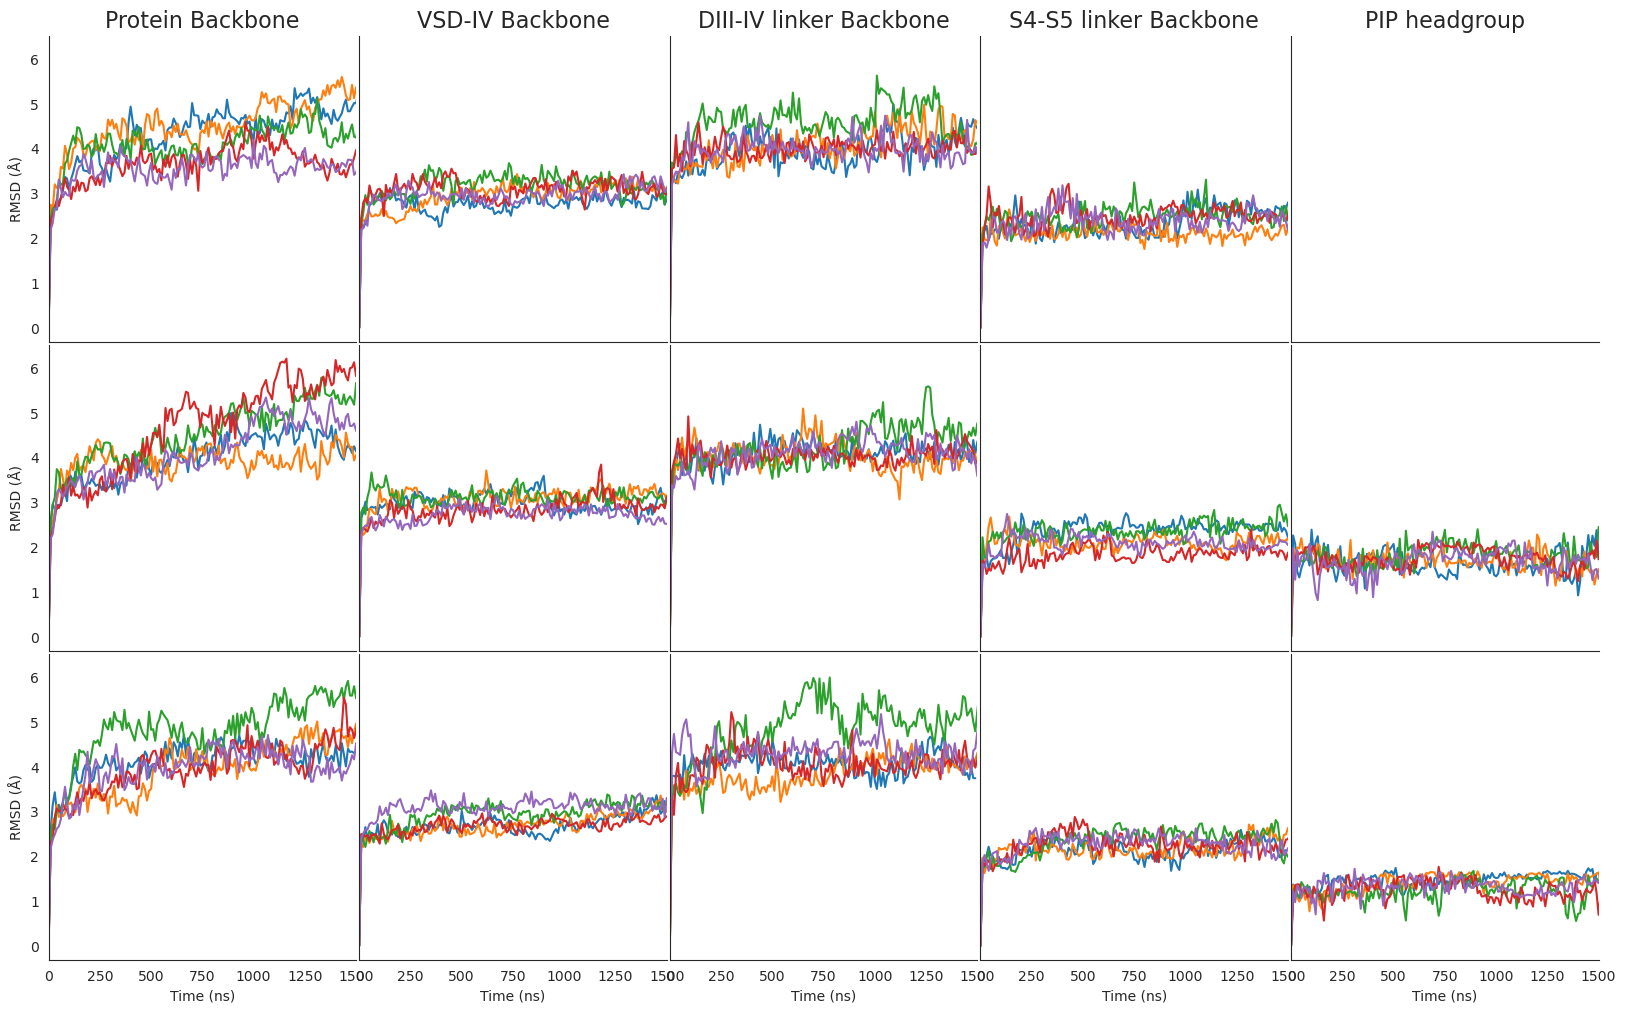

In [13]:
bbsel = "name CA C O N"
vsd4sel = "resid 867-987"
d34sel = "resid 830-866"
s45sel = "resid 988-1002"
pipsel = "resname APH"

sns.set_style("white")

fig, ax = plt.subplots(3,5, figsize=(20, 12), sharey=True, sharex=True)

plot_rmsd_panel(bbsel, "protein backbone -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,0])

plot_rmsd_panel(vsd4sel, "VSD-IV -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,1])

plot_rmsd_panel(d34sel, "DIII-IV linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,2])

plot_rmsd_panel(s45sel, "S4-S5 linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,3])

plot_rmsd_panel(pipsel, "PIP2 headgroup", ua1, ua2, ua3, ua4, ua5, ax[1,4])
plot_rmsd_panel(pipsel, "PIP1 headgroup", ue1, ue2, ue3, ue4, ue5, ax[2,4])


plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0,0].set_title("Protein Backbone", fontsize=16)
ax[0,1].set_title("VSD-IV Backbone", fontsize=16)
ax[0,2].set_title("DIII-IV linker Backbone", fontsize=16)
ax[0,3].set_title("S4-S5 linker Backbone", fontsize=16)
ax[0,4].set_title("PIP headgroup", fontsize=16)

# RMSF

In [104]:
datBA = rmsf2df_allres(250)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

R1337_-PIP1/2 vs. R1337_+PIP2: t-test independent samples, P_val:1.011e-02 t=3.348e+00
P1336_-PIP1/2 vs. P1336_+PIP2: t-test independent samples, P_val:2.400e-02 t=2.778e+00
[[('P1336', '-PIP1/2'), ('P1336', '+PIP2')], [('R1337', '-PIP1/2'), ('R1337', '+PIP2')]]


(0.0, 1.8)

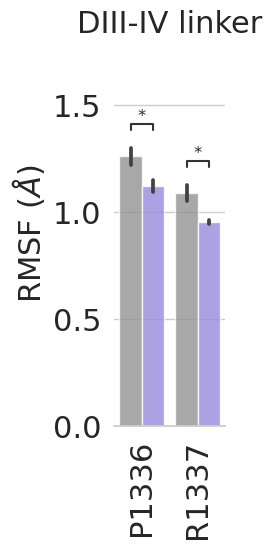

In [265]:
pal = [
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0), 860, 863, "DIII-IV linker", sig=True, pal=pal)
plt.legend().remove()
plt.ylim(0, 1.8)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_-PIP1/2 vs. L1472_+PIP2: t-test independent samples, P_val:1.501e-02 t=3.085e+00
F1473_-PIP1/2 vs. F1473_+PIP2: t-test independent samples, P_val:1.914e-02 t=2.925e+00
A1474_-PIP1/2 vs. A1474_+PIP2: t-test independent samples, P_val:5.666e-02 t=2.226e+00
L1475_-PIP1/2 vs. L1475_+PIP2: t-test independent samples, P_val:5.338e-02 t=2.264e+00
M1476_-PIP1/2 vs. M1476_+PIP2: t-test independent samples, P_val:4.029e-02 t=2.444e+00
L1471_-PIP1/2 vs. L1471_+PIP2: t-test independent samples, P_val:1.028e-01 t=1.842e+00
G1464_-PIP1/2 vs. G1464_+PIP2: t-test independent samples, P_val:1.641e-01 t=1.532e+00
R1463_-PIP1/2 vs. R1463_+PIP2: t-test independent samples, P_val:1.778e-01 t=1.478e+00
A1465_-PIP1/2 vs. A1465_+PIP2: t-test independent samples, P_val:4.557e-02 t=2.365e+00
K1466_-PIP1/2 vs. K1466_+PIP2: t-tes

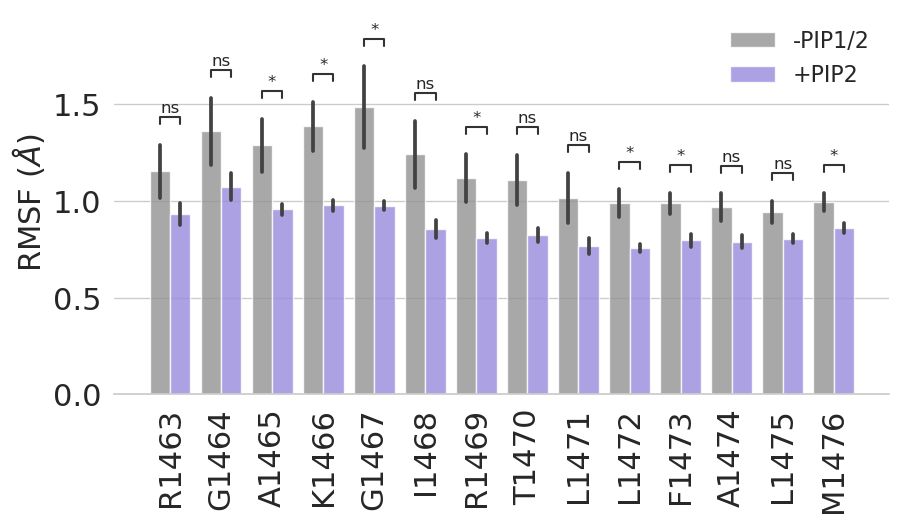

In [264]:
pal = [
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0),  987, 1002, "", sig=True, pal=pal)

# Supp Fig - combined +PIP1/PIP2

In [94]:
dfrmsf_combined = pd.concat([datBA, datBE[datBE['PIP']=='+PIP1']], axis=0)

,RES,og_num,RES1,new_num,RESshort,RESID,color,rmsf,rep,PIP
0,VAL,119,VAL,1,V,V119,"(0.996, 0.797, 0.598)",4.825888,repa1,+PIP2
1,VAL,120,VAL,2,V,V120,"(0.996, 0.797, 0.598)",4.190134,repa1,+PIP2
2,ARG,121,ARG,3,R,R121,"(0.996, 0.398, 0.797)",4.051656,repa1,+PIP2
3,ARG,122,ARG,4,R,R122,"(0.996, 0.398, 0.797)",4.098681,repa1,+PIP2
4,GLY,123,GLY,5,G,G123,"(0.996, 0.797, 0.598)",4.087223,repa1,+PIP2
...,...,...,...,...,...,...,...,...,...,...
1125,PHE,1601,PHE,1126,F,F1601,"(0.598, 0.996, 0.598)",1.150247,repa5,+PIP1
1126,ASN,1602,ASN,1127,N,N1602,"(0.797, 0.797, 0.996)",1.378241,repa5,+PIP1
1127,VAL,1603,VAL,1128,V,V1603,"(0.996, 0.797, 0.598)",1.603425,repa5,+PIP1
1128,ALA,1604,ALA,1129,A,A1604,"(0.996, 0.797, 0.598)",1.870962,repa5,+PIP1


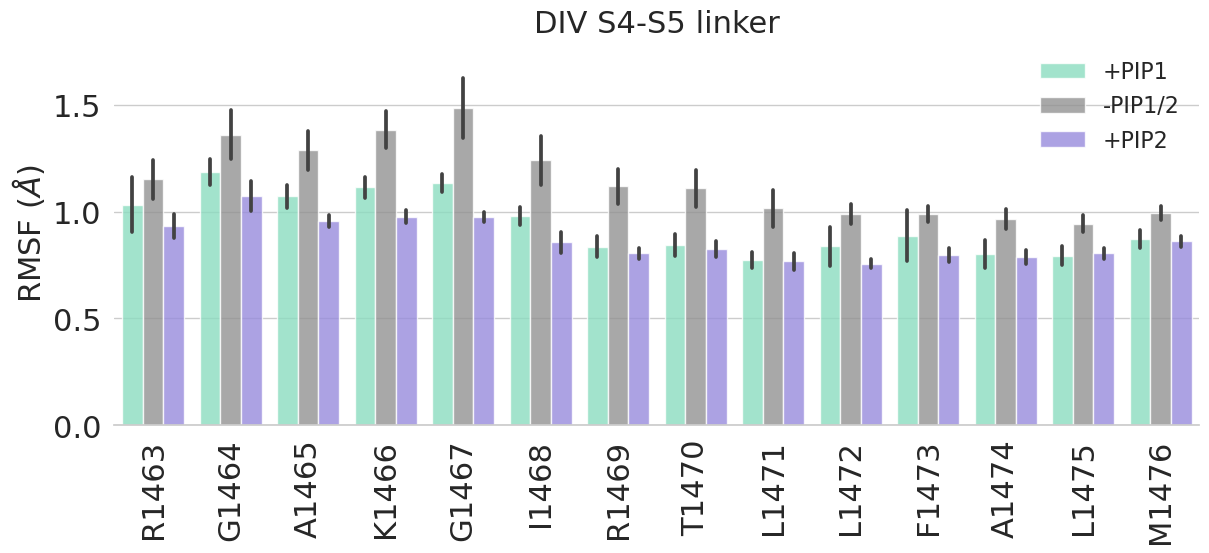

In [136]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 987, 1002, "DIV S4-S5 linker", sig=False, pal=pal)

plt.ylim(0,1.8)

plt.savefig('s4s5_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')

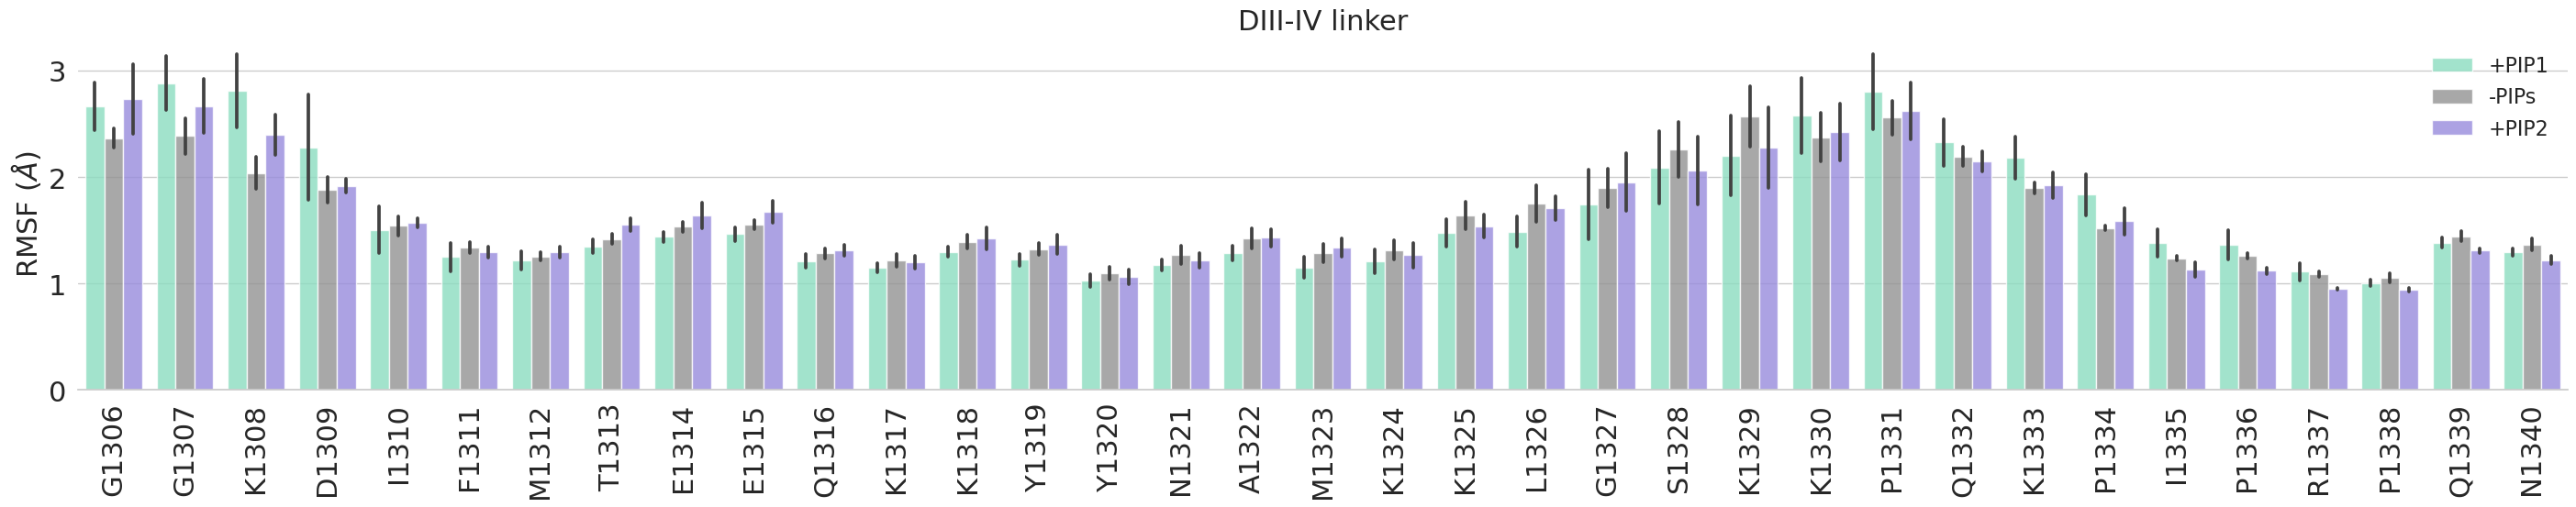

In [88]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 830, 866, "DIII-IV linker", sig=False, pal=pal)

plt.savefig('d3-4_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')